## how to decide on the clusters?

In [18]:
from scipy.spatial.distance import cdist

In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [4]:
iris=sns.load_dataset("iris")

In [5]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Label encoding of species column numerically
le = LabelEncoder()
le.fit(iris['species'])
print(list(le.classes_))
iris['species'] = le.transform(iris['species'])

['setosa', 'versicolor', 'virginica']


In [7]:
print(iris['species'][0:5])
print(iris['species'][50:55])
print(iris['species'][100:105])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64
50    1
51    1
52    1
53    1
54    1
Name: species, dtype: int64
100    2
101    2
102    2
103    2
104    2
Name: species, dtype: int64


In [8]:
iris.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
iris_matrix = pd.DataFrame.as_matrix(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [10]:
cluster_model = KMeans(n_clusters=3, random_state=10)

In [11]:
print(cluster_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)


In [12]:
cluster_model.fit(iris_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [13]:
cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### elbow method

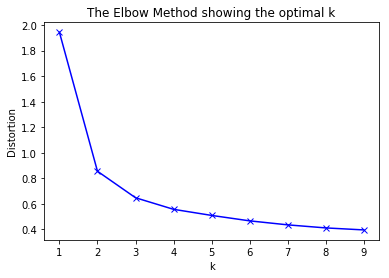

In [19]:
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(iris_matrix)
    kmeanModel.fit(iris_matrix)
    distortions.append(sum(np.min(cdist(iris_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / iris_matrix.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()